### Cleaning Data

In [1]:
# Install the required libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
import sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

In [9]:
# URL of the dataset
dataset = 'https://raw.githubusercontent.com/Moodify-Project/Machine-Learning/main/Dataset/emotions_new.csv'
# load Dataset
df = pd.read_csv(dataset)

In [11]:
# Changing column name
df.rename(columns={'label': 'Emotion'}, inplace=True)
# Changing label name
df['Emotion'] = df['Emotion'].replace({0: 'sadness', 1: 'happiness', 2: 'anger', 3: 'worry', 4: 'enthusiasm'})
df.head()

,text,Emotion
0,i just feel really helpless and heavy hearted,worry
1,ive enjoyed being able to slouch about relax a...,sadness
2,i gave up my internship with the dmrg and am f...,worry
3,i dont know i feel so lost,sadness
4,i am a kindergarten teacher and i am thoroughl...,worry


In [12]:
# Filtering desired emotions
# desired_emotions = ['happiness', 'sadness', 'worry', 'anger', 'enthusiasm']
# df_filtered = df[df['Emotion'].isin(desired_emotions)]

print(df['Emotion'].value_counts())

Emotion
happiness     146276
sadness       126352
anger          57427
worry          56171
enthusiasm     15731
Name: count, dtype: int64


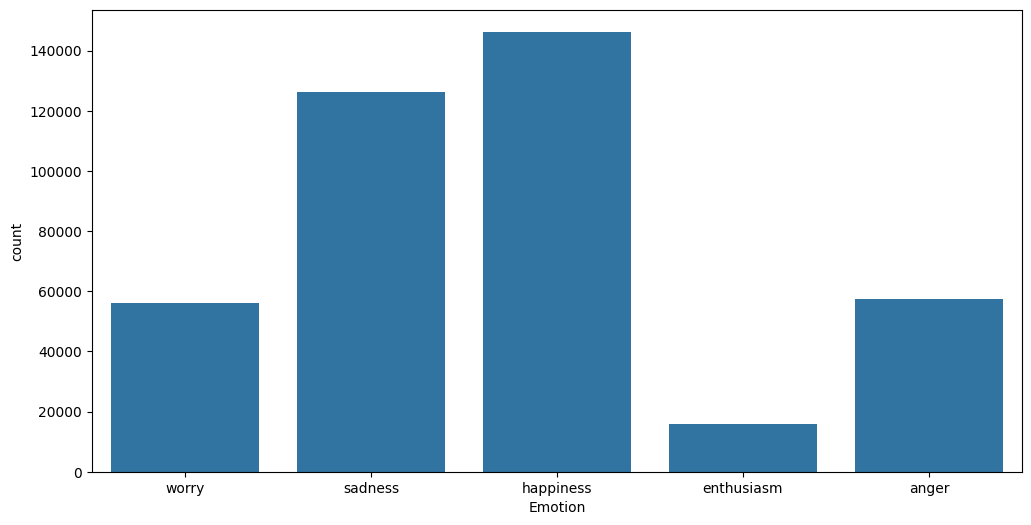

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["Emotion"])
plt.show()

**Pre-processing Data**

In [ ]:
dir(nfx)

In [16]:
# Delete rows with empty values or non-string values.
df = df.dropna(subset=['text'])
df = df[df['text'].apply(lambda x: isinstance(x, str))]

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = nfx.remove_urls(text) # remove url
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # remove mentions  
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) # remove hashtags
    text = re.sub(r'\bRT\b', '', text) # remove RT 
    text = re.sub(r'\s+', ' ', text).strip()
    text = nfx.remove_numbers(text) # remove number  
    text = nfx.remove_special_characters(text) # remove special character  
    text = text.lower() # lowercase
    text = nfx.remove_stopwords(text) # Delete stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatization
    return text

# Apply text cleaning to the 'text' column.
df['Clean_text'] = df['text'].apply(clean_text)

df[['text', 'Clean_text']]


,text,Clean_text
0,i just feel really helpless and heavy hearted,feel helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,ive enjoyed able slouch relax unwind frankly n...
2,i gave up my internship with the dmrg and am f...,gave internship dmrg feeling distraught
3,i dont know i feel so lost,dont know feel lost
4,i am a kindergarten teacher and i am thoroughl...,kindergarten teacher thoroughly weary job take...
...,...,...
401952,going to watch boy in the striped pj's hope i ...,going watch boy striped pjs hope dont cry
401953,"gave the bikes a thorough wash, degrease it an...",gave bike thorough wash degrease grease think ...
401954,"had SUCH and AMAZING time last night, McFly we...",amazing time night mcfly incredible
401955,Succesfully following Tayla!!,succesfully following tayla


In [17]:
# Save the cleaned DataFrame to a CSV file
df[['Emotion', 'Clean_text']].to_csv('emotions_clean.csv', index=False)


### Exploratory Data Analysis (EDA)

In [18]:
# URL of the dataset
cleandataset = 'https://raw.githubusercontent.com/Moodify-Project/Machine-Learning/main/Dataset/emotions_clean.csv'
# load Dataset
df_emotion = pd.read_csv(cleandataset)

In [19]:
# Display the first few rows of the dataset
print(df_emotion.head())

# Display basic information about the dataset
print(df_emotion.info())

# Summary statistics
print(df_emotion.describe())

# Check for missing values
print(df_emotion.isnull().sum())

   Emotion                                         Clean_text
0    worry                        feel helpless heavy hearted
1  sadness  ive enjoyed able slouch relax unwind frankly n...
2    worry            gave internship dmrg feeling distraught
3  sadness                                dont know feel lost
4    worry  kindergarten teacher thoroughly weary job take...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401957 entries, 0 to 401956
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Emotion     401957 non-null  object
 1   Clean_text  401875 non-null  object
dtypes: object(2)
memory usage: 6.1+ MB
None
          Emotion Clean_text
count      401957     401875
unique          5     369098
top     happiness       feel
freq       146276        138
Emotion        0
Clean_text    82
dtype: int64


In [20]:
# Removing rows that contain missing values: 
df_emotion.dropna(subset=['Emotion', 'Clean_text'], inplace=True)

print(df_emotion.isnull().sum())

Emotion       0
Clean_text    0
dtype: int64


In [21]:
#Keyword extraction (common words)
from collections import Counter

def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

emotion_list = df_emotion['Emotion'].unique().tolist()

In [22]:
emotion_list

['worry', 'sadness', 'happiness', 'enthusiasm', 'anger']

In [23]:
#Sadness
sadness_list = df_emotion[df_emotion['Emotion'] == 'sadness']['Clean_text'].dropna().tolist()
#sadness_list = [item for item in sadness_list if isinstance(item, str)]
sadness_docx = ' '.join(sadness_list)

#Enthusiasm
enthusiasm_list = df_emotion[df_emotion['Emotion'] == 'enthusiasm']['Clean_text'].tolist()
#enthusiasm_list = [item for item in enthusiasm_list if isinstance(item, str)]
enthusiasm_docx = ' '.join(enthusiasm_list)

#Worry
worry_list = df_emotion[df_emotion['Emotion'] == 'worry']['Clean_text'].tolist()
#worry_list = [item for item in worry_list if isinstance(item, str)]
worry_docx = ' '.join(worry_list)

#Happiness
happiness_list = df_emotion[df_emotion['Emotion'] == 'happiness']['Clean_text'].tolist()
#happiness_list = [item for item in happiness_list if isinstance(item, str)]
happiness_docx = ' '.join(happiness_list)

#Anger
anger_list = df_emotion[df_emotion['Emotion'] == 'anger']['Clean_text'].tolist()
anger_docx = ' '.join(anger_list)

In [24]:
# Extract Keyword
keyword_sadness = extract_keywords(sadness_docx)
keyword_enthusiasm = extract_keywords(enthusiasm_docx)
keyword_worry = extract_keywords(worry_docx)
keyword_happiness = extract_keywords(happiness_docx)
keyword_anger = extract_keywords(anger_docx)

In [25]:
# Keyword Graph
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {}".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

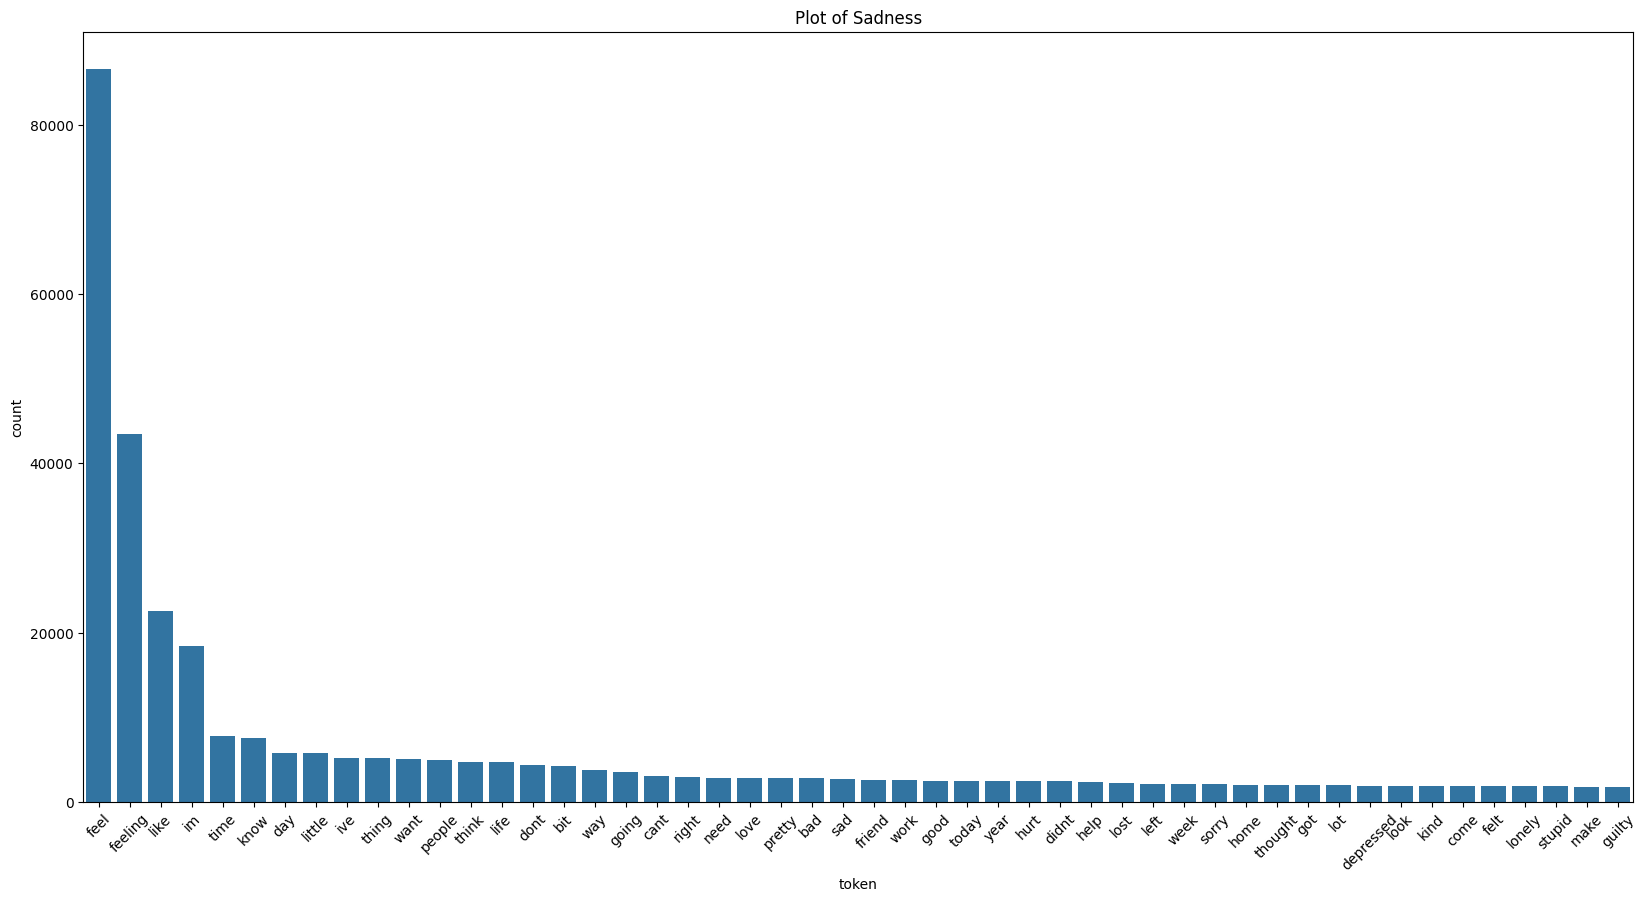

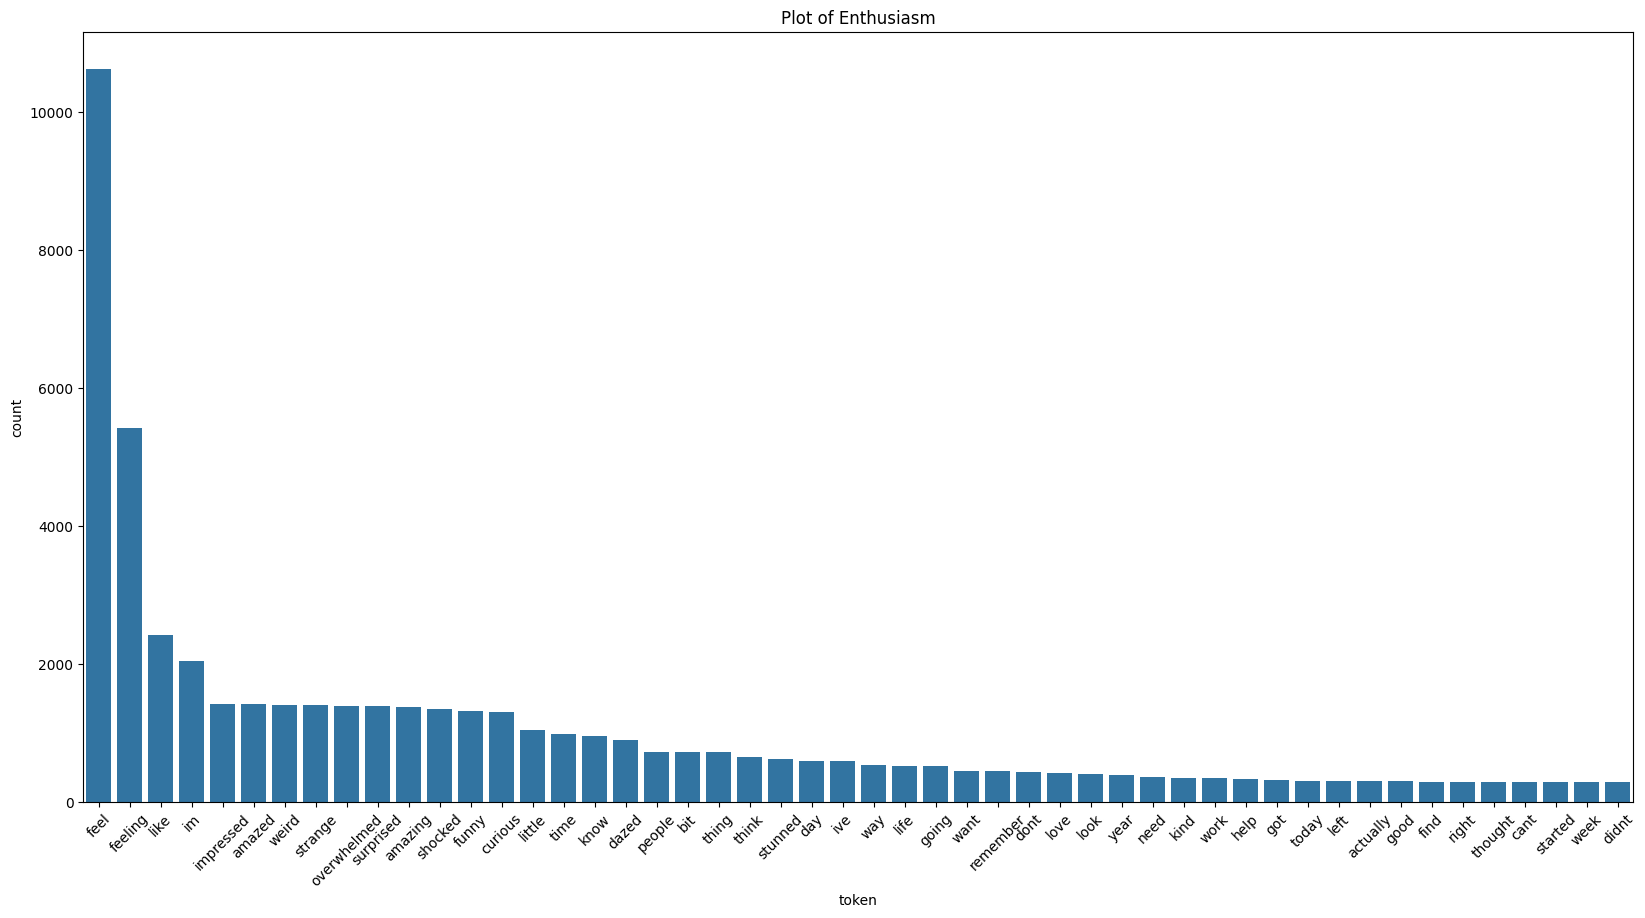

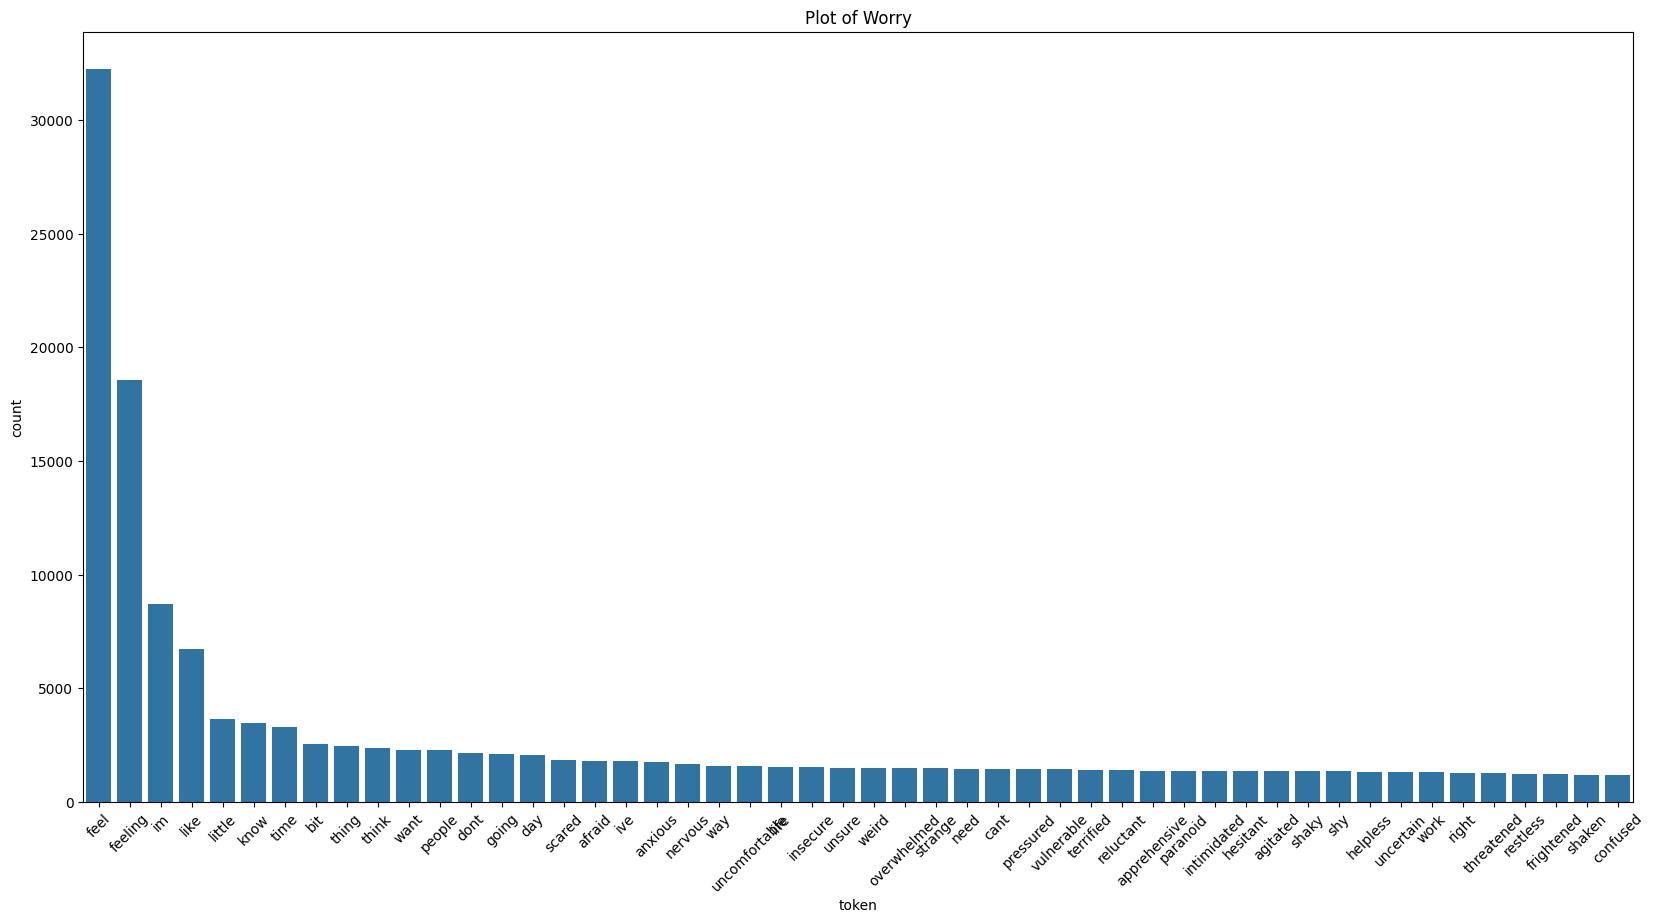

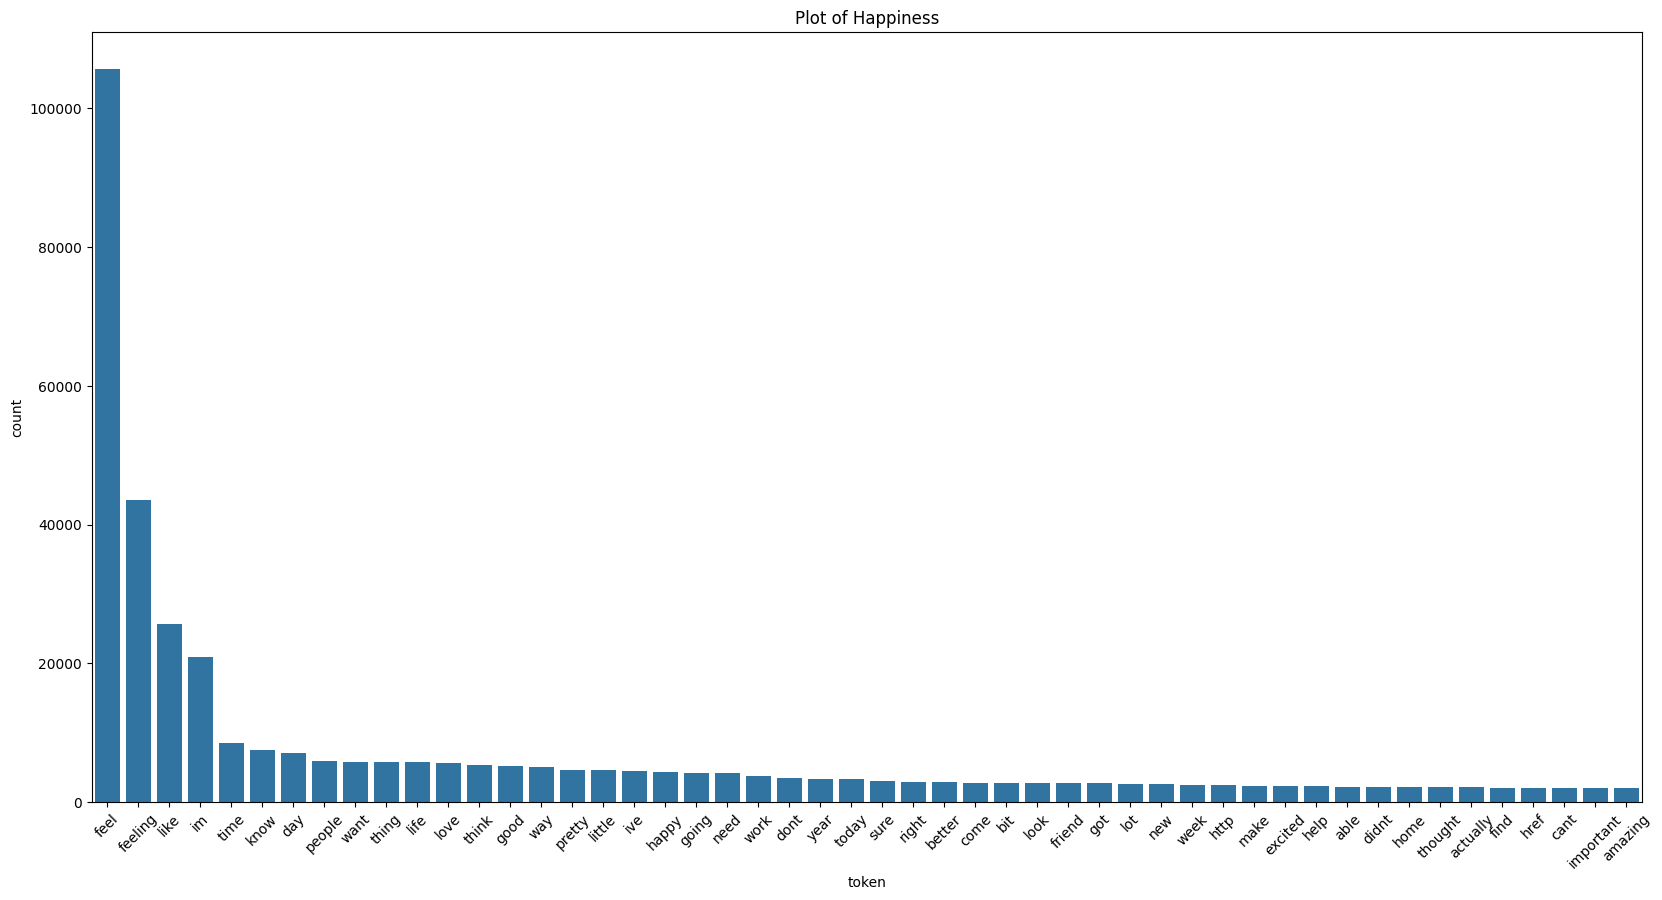

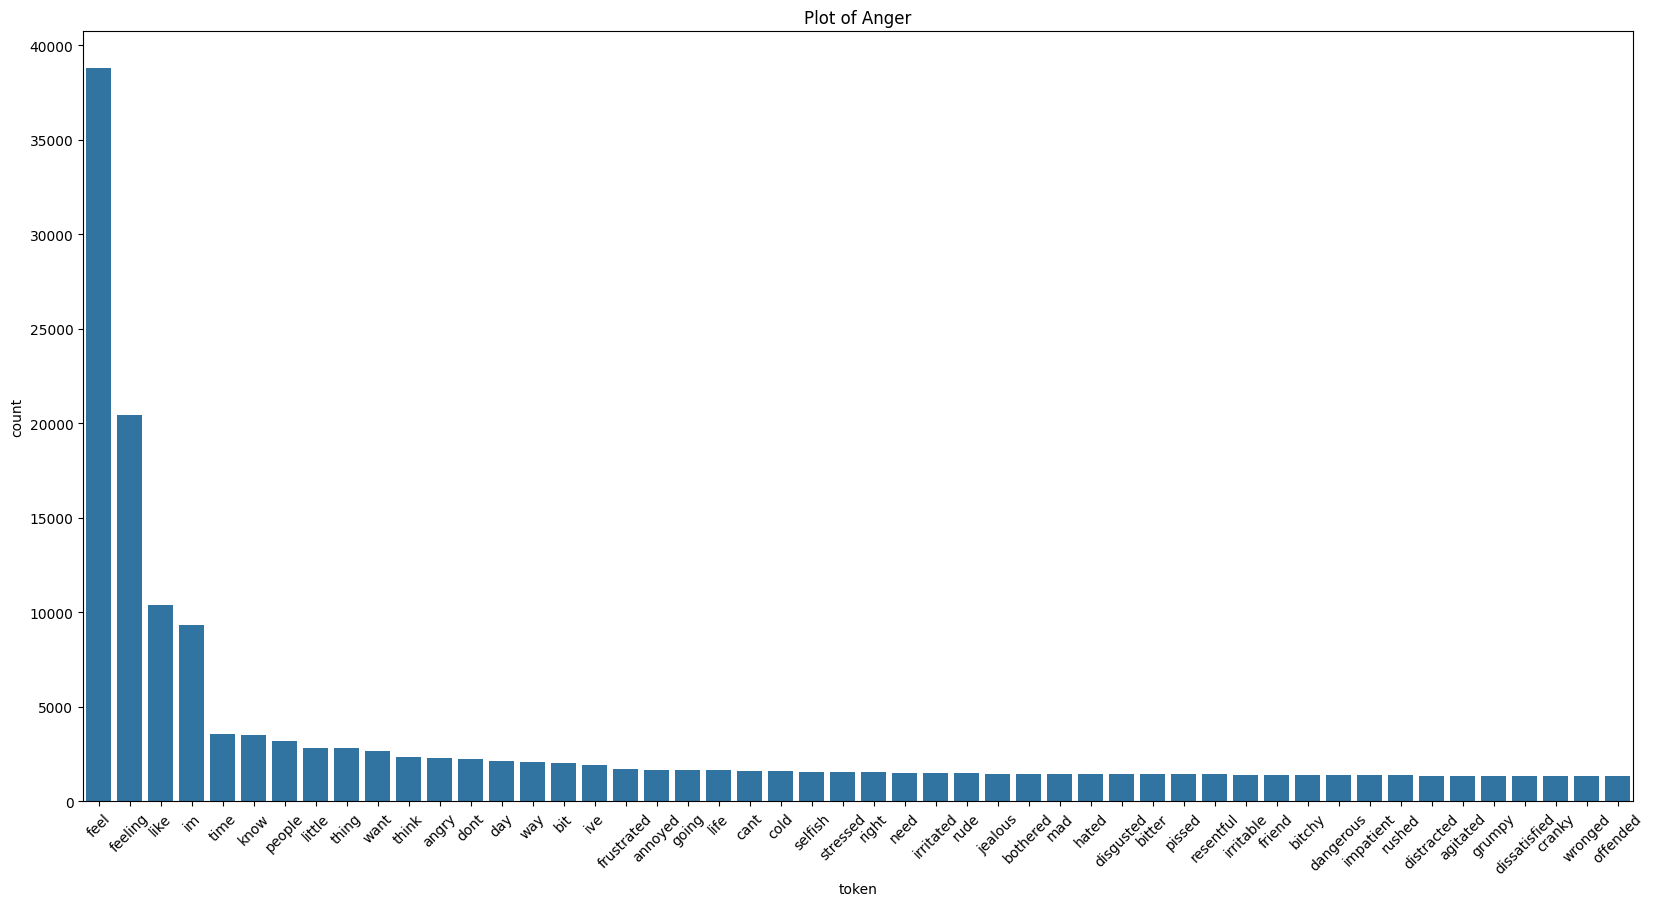

In [26]:
plot_most_common_words(keyword_sadness,"Sadness")
plot_most_common_words(keyword_enthusiasm,"Enthusiasm")
plot_most_common_words(keyword_worry,"Worry")
plot_most_common_words(keyword_happiness,"Happiness")
plot_most_common_words(keyword_anger,"Anger")

In [27]:
# Word Cloud
from wordcloud import WordCloud
def plot_wordcloud(docx):
    mywordcloud = WordCloud(width=800, height=400, background_color='white').generate(docx)
    plt.figure(figsize=(10,8))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.title('Word Cloud of All Emotion')
    plt.axis('off')
    plt.show()

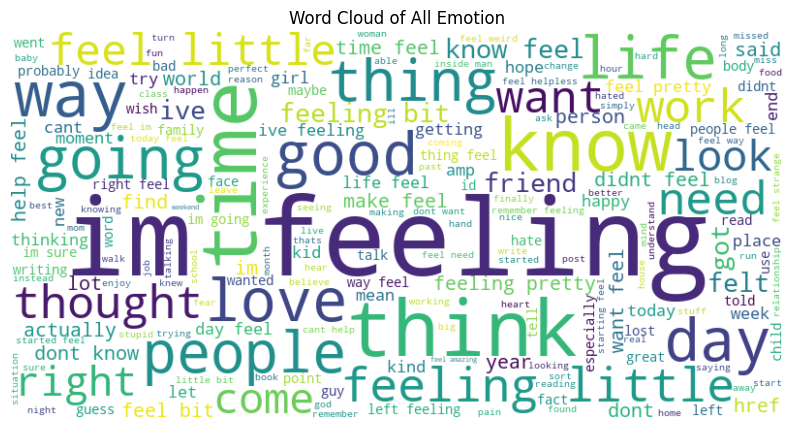

In [28]:
combined_docx = sadness_docx + " " + enthusiasm_docx + " " + worry_docx + " " + happiness_docx + " " + anger_docx + " "
plot_wordcloud(combined_docx)

**Undersampling** skipp

In [77]:
# Count the number of data for each emotion class.
class_counts = df_emotion['Emotion'].value_counts()

# data that wants to be retained in the majority class
min_class_size = class_counts.min()

# Undersampling
undersampled_df = pd.DataFrame()

for emotion in class_counts.index:
    # Select a subset for this class
    emotion_data = df_emotion[df_emotion['Emotion'] == emotion]
    
    if len(emotion_data) > min_class_size:
        emotion_data = emotion_data.sample(n=min_class_size, random_state=42)
        
    undersampled_df = pd.concat([undersampled_df, emotion_data])

print(undersampled_df['Emotion'].value_counts())

Emotion
happiness     14972
sadness       14972
anger         14972
worry         14972
enthusiasm    14972
Name: count, dtype: int64


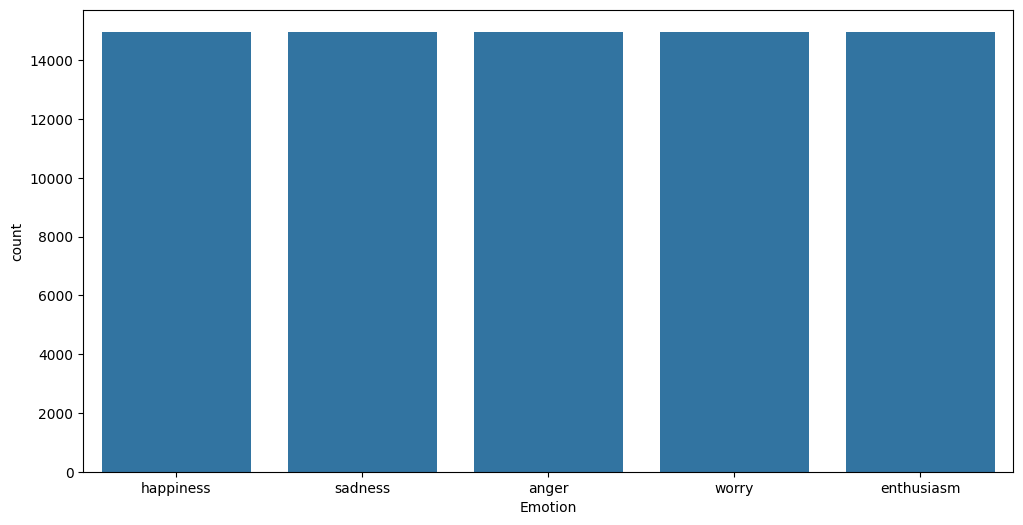

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(x=undersampled_df["Emotion"])
plt.show()

**Split Data**

In [29]:
from sklearn.model_selection import train_test_split

X = df_emotion['Clean_text']
y = df_emotion['Emotion']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42)

print(f"Train shape: {X_train.shape}, Temporary shape: {X_temp.shape}")

Train shape: (321500,), Temporary shape: (80375,)


In [30]:
# Separate the temporary data into validation (50%) and test (50%).
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, 
    y_temp, 
    test_size=0.5, 
    random_state=42)
print(f"Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Validation shape: (40187,), Test shape: (40188,)


In [31]:
print("Example data in X_train:")
print(X_train.head())

print("Example data in X_test:")
print(X_test.head())

print("Example data in X_val:")
print(X_val.head())

Example data in X_train:
87438     feel restless busyness starting detract spirit...
45486     feel probably obnoxious example war glorification
399817          look like great time happy birthday bd girl
337220                            feel afraid im team night
387991    ive got fairly flat route available problem lo...
Name: Clean_text, dtype: object
Example data in X_test:
387075                          sorry hear wish word better
359230    sahm leaf feeling isolated rest world found im...
167807    stop trying fill void god surrogate continue f...
151325    feel improve dont joke dont like gossip im liv...
135775                               feel seriously pleased
Name: Clean_text, dtype: object
Example data in X_val:
395553                             im trying moving morning
381856    feel strong need shield harm compared son deve...
224802    thought going feel numb way aid station foot s...
311428    need handle feeling continue address issue lis...
88447                   

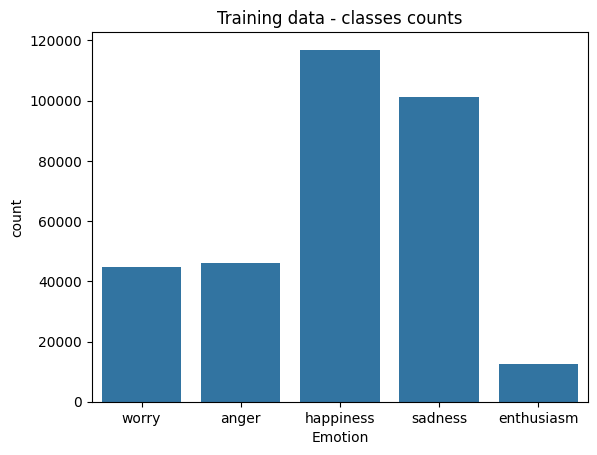

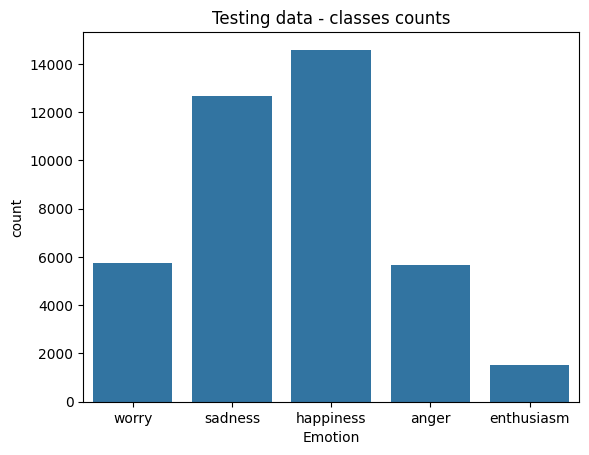

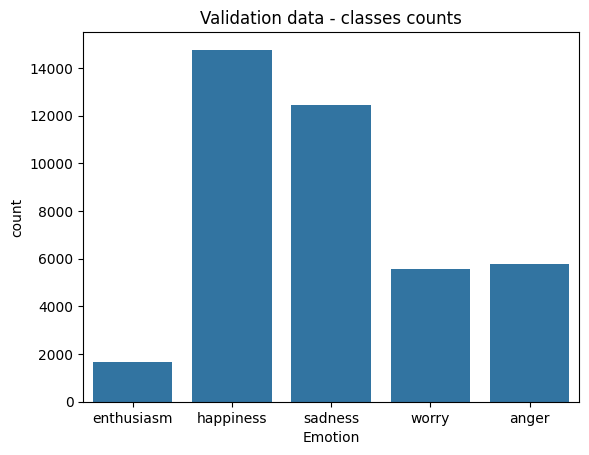

In [32]:
# Visualize classes counts
sns.countplot(x=y_train)
plt.title("Training data - classes counts")
plt.show()

sns.countplot(x=y_test)
plt.title("Testing data - classes counts")
plt.show()

sns.countplot(x=y_val)
plt.title("Validation data - classes counts")
plt.show()

**Label Encoding**

In [33]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [34]:
y_train 

array([4, 0, 2, ..., 4, 3, 0])

In [35]:
from keras.utils import to_categorical

In [36]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [37]:
y_train

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

**Tokenization**

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

print(tokenizer.word_index)

In [41]:
X_train.head()

87438     feel restless busyness starting detract spirit...
45486     feel probably obnoxious example war glorification
399817          look like great time happy birthday bd girl
337220                            feel afraid im team night
387991    ive got fairly flat route available problem lo...
Name: Clean_text, dtype: object

In [42]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

for i in range(3):
    print(X_train.iloc[i],'\n',sequences_train[i])

feel restless busyness starting detract spiritual growth 
 [1, 416, 9703, 157, 15328, 1799, 1914]
feel probably obnoxious example war glorification 
 [1, 144, 954, 1393, 1335, 21099]
look like great time happy birthday bd girl 
 [32, 3, 107, 5, 34, 772, 11717, 84]


In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [44]:
X_train = pad_sequences(sequences_train, maxlen=256, truncating='pre') # truncating='pre' => remove post padding extra than maxlen
X_test = pad_sequences(sequences_test, maxlen=256, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=256, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 68885


**Model**

In [215]:
# Embedding
#max_features = 20000
#maxlen = 100
#embedding_size = 128

# Convolution
#kernel_size = 5
#filters = 64
#pool_size = 4

# LSTM
#lstm_output_size = 70


In [45]:
# Embedding Layer
max_features = vocabSize    # number of unique words in the vocabulary
maxlen = X_train.shape[1]   # length of each sequence or padding size
embedding_size = 200    # uses 200 length vectors to represent each word

# Convolution Layer
kernel_size = 5 # Kernel of size 5*5 matrix
filters = 128 # number of convolutional filters to use

#Max Pooling Layer
pool_size = 4 # size of the max pooling area

# LSTM Layer
lstm_output_size = 128

# Training
# batch_size = 30
# epochs = 2

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from keras.callbacks import EarlyStopping


In [47]:
print('Build model...')

model = Sequential()
model.add(Input(shape=(maxlen,)))                                       # Tambahkan Input Layer
model.add(Embedding(vocabSize, embedding_size))    # 1st Layer - Embedding
model.add(Dropout(0.25))                                             # 2nd Layer - Dropout
model.add(Conv1D(filters,                                            # 3rd Layer - Convolution
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))                         # 4th Layer - MaxPooling
model.add(LSTM(lstm_output_size))                                    # 5th Layer - LSTM     
model.add(Dense(5))                                                  # 6th Layer - Dense
model.add(Activation('softmax'))                                     # 7th Layer - Activation    

model.summary()

Build model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 256, 200)            │      13,777,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256, 200)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 252, 128)            │         128,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 63, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             645 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,037,357 (53.55 MB)

 Trainable params: 14,037,357 (53.55 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(
    loss='categorical_crossentropy',  # Jika target Anda adalah one-hot encoded
    optimizer='adam',                # Optimizer yang umum digunakan
    metrics=['accuracy']             # Metode evaluasi
)

In [49]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)

In [50]:
#Dumping The Model ===========================================PENDING
from keras.callbacks import ModelCheckpoint

model_file_name = 'model_emotion.keras'
best_model = ModelCheckpoint(
    model_file_name, 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True, 
    mode='min')

In [51]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=30,
                    callbacks=[callback]
                   )

Epoch 1/30
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 1001s 795ms/step - accuracy: 0.7976 - loss: 0.4871 - val_accuracy: 0.9308 - val_loss: 0.1413
Epoch 2/30
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 665s 529ms/step - accuracy: 0.9413 - loss: 0.1217 - val_accuracy: 0.9313 - val_loss: 0.1416
Epoch 3/30
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 759s 605ms/step - accuracy: 0.9513 - loss: 0.0967 - val_accuracy: 0.9287 - val_loss: 0.1541
Epoch 4/30
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 847s 675ms/step - accuracy: 0.9574 - loss: 0.0804 - val_accuracy: 0.9257 - val_loss: 0.1712


In [52]:
print(model)

layer_outputs = [layer.output for layer in model.layers]
layer_outputs

<Sequential name=sequential, built=True>


[<KerasTensor shape=(None, 256, 200), dtype=float32, sparse=False, name=keras_tensor_1>,
 <KerasTensor shape=(None, 256, 200), dtype=float32, sparse=False, name=keras_tensor_3>,
 <KerasTensor shape=(None, 252, 128), dtype=float32, sparse=False, name=keras_tensor_6>,
 <KerasTensor shape=(None, 63, 128), dtype=float32, sparse=False, name=keras_tensor_10>,
 <KerasTensor shape=(None, 128), dtype=float32, sparse=False, name=keras_tensor_15>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_21>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_28>]

In [ ]:
#from keras.models import Model

#activation_model = Model(inputs=model.input, outputs=layer_outputs)
#activations = activation_model.predict(predict('I am enjoy'))
#layer0 = activations[0]

In [53]:
scores = model.evaluate(X_test, y_test, verbose=1) 
print("Final Accuracy : %.2f%%" %(scores[1]*100))
print("Final Loss : %.2f%%" % (scores[0]*100))

1256/1256 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9284 - loss: 0.1425
Final Accuracy : 92.96%
Final Loss : 14.27%


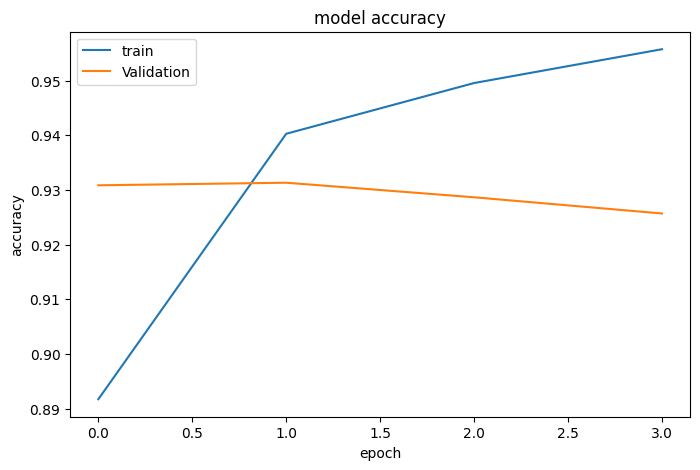

In [54]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

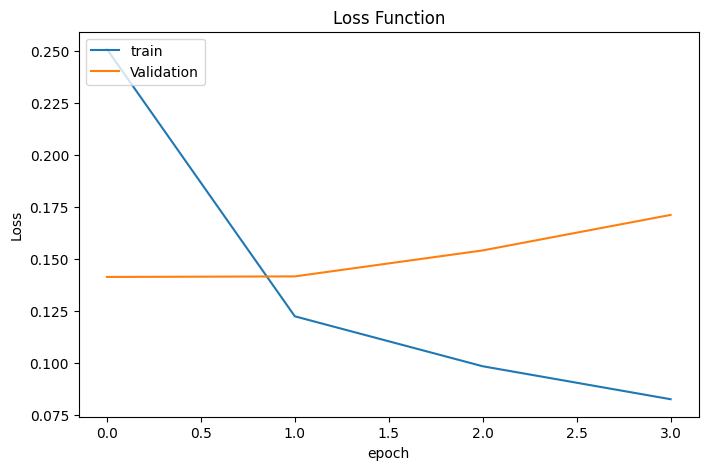

In [55]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [56]:
# Classify custom sample
def predict(sentence,modelxx):
    # print(sentence)
    sentence = clean_text(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=256, truncating='pre')
    result = le.inverse_transform(np.argmax(modelxx.predict(sentence), axis=-1))[0]
    proba =  np.max(modelxx.predict(sentence))
    print(f"{result} : {proba}\n\n")

In [57]:
# Saving The Model
import pickle
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)
    
with open('labelEncoder.pickle', 'wb') as f:
    pickle.dump(le, f)
    
    
model.save('Emotion Detection.keras')

In [61]:
from tensorflow.keras.models import load_model
import json

# Load model dari file .keras
model = load_model('Emotion Detection.keras')

# Simpan arsitektur model ke file JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

print("Arsitektur model berhasil diekspor ke model.json.")


Arsitektur model berhasil diekspor ke model.json.


In [58]:
from keras.models import load_model

model2 = load_model('Emotion Detection.keras')
predict('i feel like a miserable piece of garbage',model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
sadness : 0.9992419481277466




In [60]:
predict('I feel absolutely joyful, miserable, and sadness for the wonderful day ahead!',model2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
happiness : 0.9943769574165344




In [138]:
predict('I can't believe how irresponsible and careless youve been! This is completely unacceptable!',model2)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3400160422.py, line 1)